In [49]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [50]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

In [51]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [195]:
series = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")["Deg"]

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


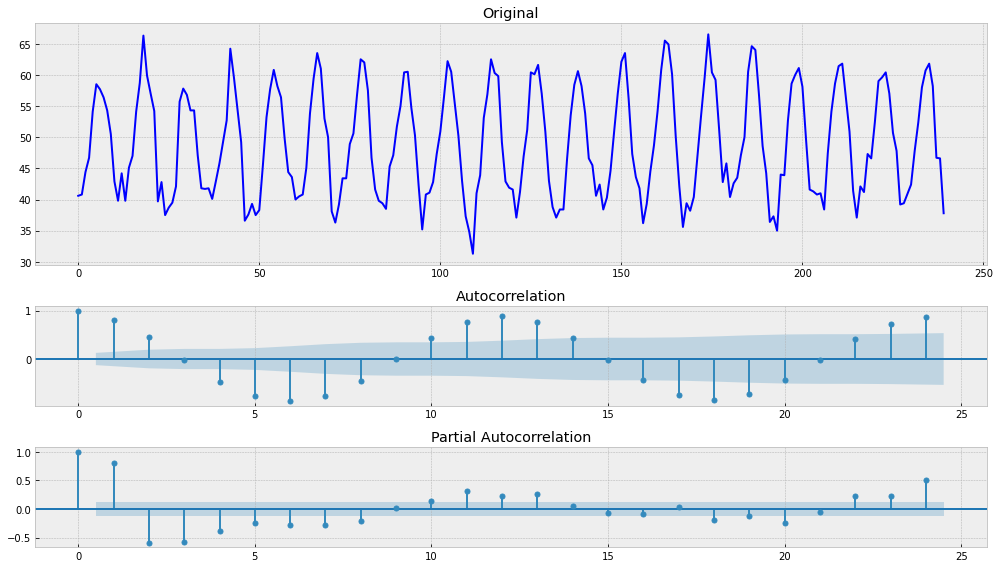

In [196]:
tsplot(series)

уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [197]:
series = boxcox(series + 1, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.752938
p-value                          0.003427
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


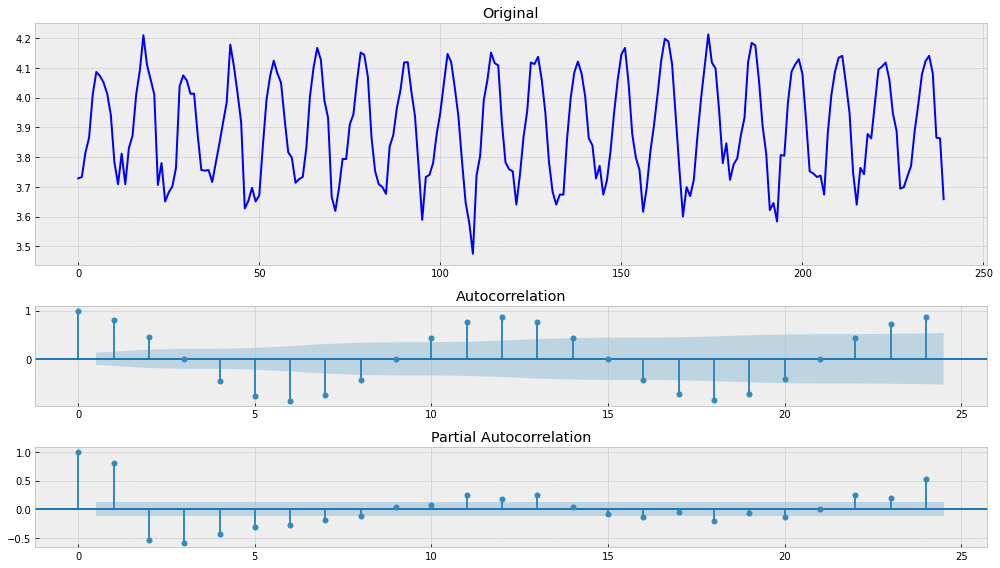

In [198]:
tsplot(series)

Уберем тренд дифференцированием.

In [199]:
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.214586e+01
p-value                        1.611404e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


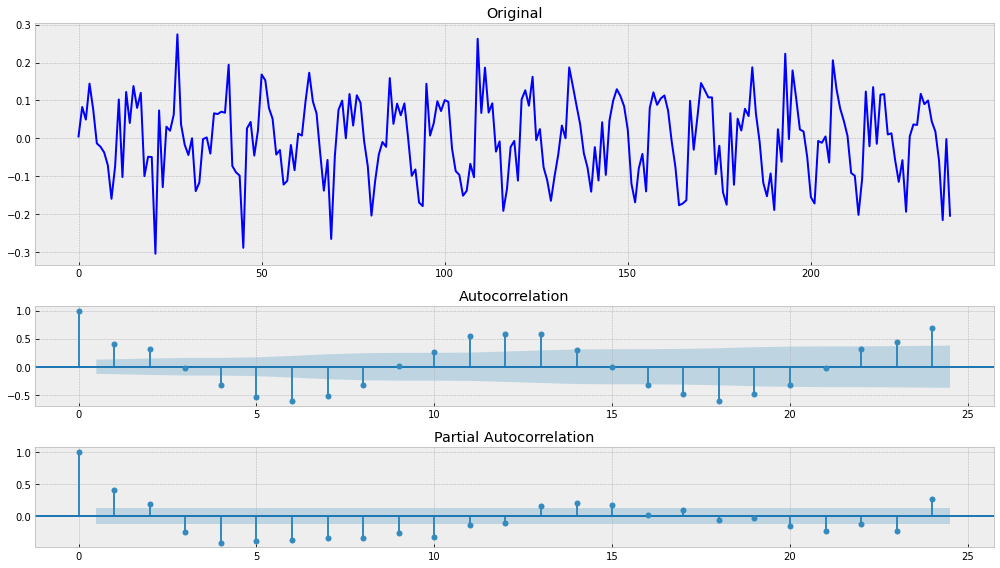

In [200]:
tsplot(series)

Уберем сезонность дифференцированием.

In [201]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -7.997620e+00
p-value                        2.380749e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


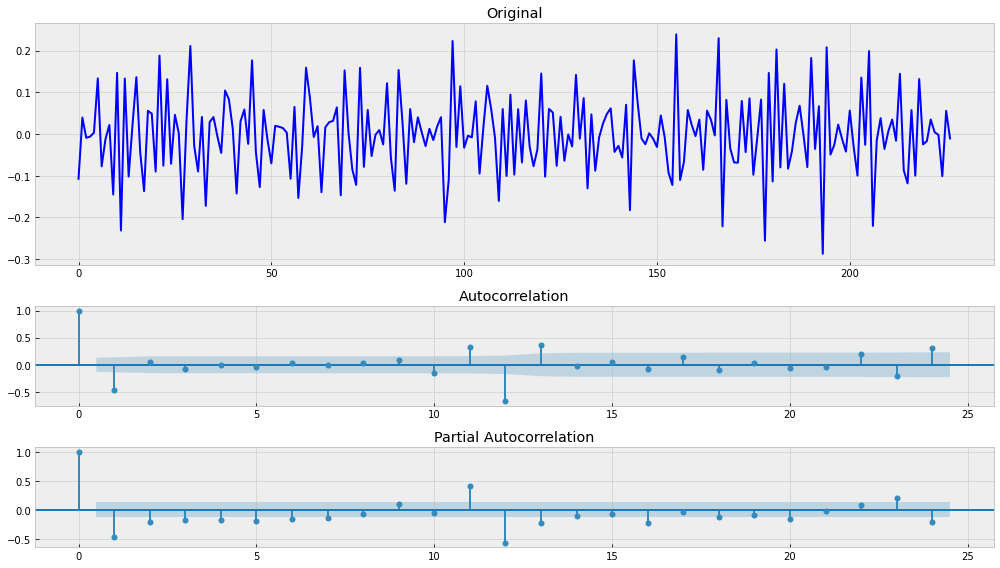

In [202]:
tsplot(series)

Выполним еще одно дифференцирование.

In [203]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -6.740247e+00
p-value                        3.132085e-09
#Lags Used                     1.500000e+01
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


c:\maindataanalysis\3.projects\machine learning\venv\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


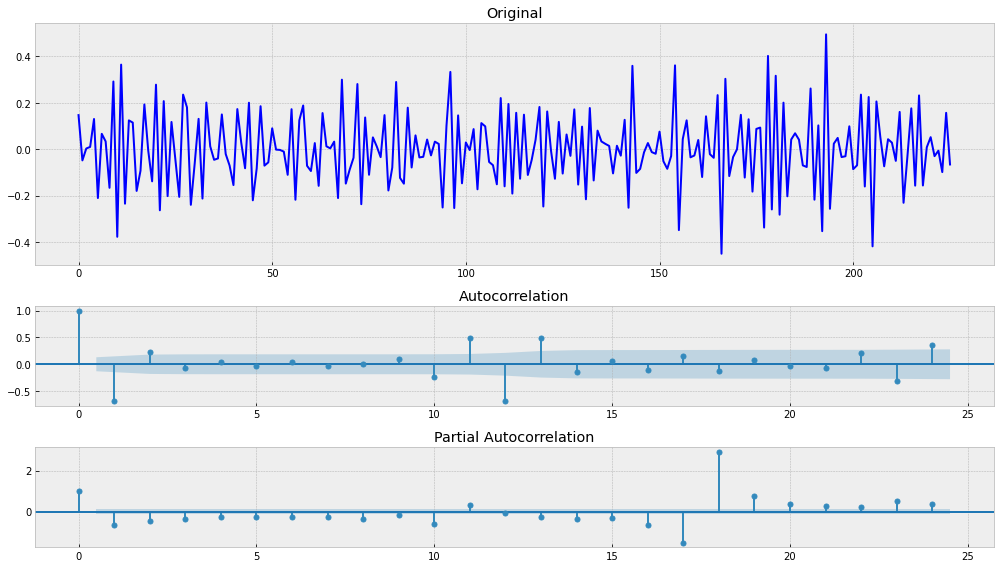

In [204]:
tsplot(series)

Выполним еще одно преобразование Бокса-Кокса

In [205]:
series = boxcox(series + 1, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.375928
p-value                          0.011807
#Lags Used                      15.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


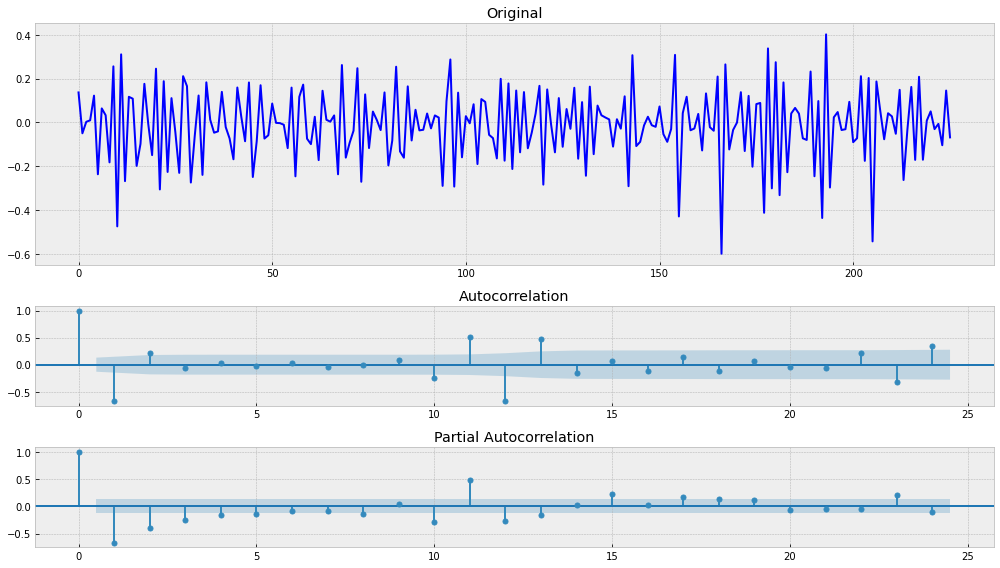

In [206]:
tsplot(series)


